In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch10_N차원 배열 다루기</font></b>

- 배열은 반드시 동일 자료형의 집합이다
- 1차원 : scalar(1개), vector(2개이상), 2차원 : matrix, 3차원 : Tensor
- [numpy](https://numpy.org/doc/stable/)
- [numpy_API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지

# 1절. numpy 패키지
- 배열의 알파이자 오메가는 numpy! 

In [7]:
import numpy as np
np.__version__

'1.23.5'

In [9]:
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생서
a= np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [28]:
from numpy import arange
a = arange(15).reshape(3,5)  # 3행 5열로 변경
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [29]:
type(a) # a변수의 타입

numpy.ndarray

In [30]:
a.dtype  # a배열 요소 하나하나의 type, 동일 자료형만 가능

dtype('int32')

In [23]:
n=range(1,32)
tot = sum(2**i for i in n)
tot

4294967294

In [31]:
a.itemsize  #한요소의 byte size

4

In [32]:
a.ndim # 차원수(축수)

2

In [33]:
a.size # 배열요소의 총 개수

15

In [34]:
a.shape  # 배열의 구조 (튜플로 출력)

(3, 5)

## 1.2 배열의 구조변경 (구조, 타입)

In [38]:
print('구조변경 전\n', a)
a.shape = (5,3)    # 구조 변경 5행 3열, 배열 각 요소의 순서는 변경되지 않음
print('구조변경 후\n', a)

구조변경 전
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [70]:
# 타입변경(?)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [71]:
a.dtype

dtype('int32')

In [72]:
a.size

12

In [43]:
a[0,3] = 3000000000  # int32 보다 큰 데이터를 넣으면 오버플로우 에러 OverflowError

OverflowError: Python int too large to convert to C long

In [51]:
a.itemsize 

4

In [75]:
a.dtype = np.int64  # a 배열을 읽을 때 64bit 씩 읽는다
a.dtype

dtype('int64')

In [76]:
print(a.itemsize)
print(a.size, a.shape)
print(a)

8
6 (3, 2)
[[ 4294967296 12884901890]
 [21474836484 30064771078]
 [38654705672 47244640266]]


In [81]:
a.dtype = np.int32  # 원복이 되나? 된다!
print(a.dtype, a.itemsize,a.size, a.shape)
print(a)

int32 4 12 (3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [68]:
a.astype(np.int32)  # == a.astype('int64')  astype은 a 데이터를 바꾸는게 아니라 바꿔서 리턴(보여주는)하는 것, 바꾸려면 a에 할당해야함

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [61]:
a.flatten()  # 1차원 배열로 정렬, 마찬가지로 a의 데이터 변경은 아니다

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [82]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 1.3 배열 저장 
- 배열 저장 : pkl, npy  # 우리는 pkl로 저장 예정!
- 딥러닝 모델 저장 : h5, keras
- 머신러닝 모델 저장 : pkl, joblib

In [83]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [84]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [85]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [86]:
np.all(a == load_a)  # a 넘파이배열과 load_a 넘파이 배열이 같은지 확인. 용량이 작은 경우 이렇게 함

True

In [87]:
np.save('data/ch10_a.npy', a)  # 용량이 큰 경우는 npy파일로 저장해서 비교
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2 == a)

True

## 2절. 넘파이 배열
- np.arange : 정수 배열 밖에 못만듦
- np.array() : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones() 1로 채운 배열, zeros() 0으로 채운 배열, empty() 빈배열 만들기
- 랜덤값을 갖는 함수들 ...

## 2.1 array()함수로 넘파이 배열 만들기
array(obj, dtype, copy=T/F)
※ obj 는 리스트나 튜플, dtype= np.int32 등

In [94]:
a = np.array([2,4,6])  # 정수의 기본타입은 int32, 실수의 기본타입은 float64
a

array([2, 4, 6])

In [91]:
a = np.array([2.1,4,6])  # 하나만 소수점이 붙거나 모두가 실수, 하나만 문자가 들어가면 모두가 str으로 변경된다
a

array([2.1, 4. , 6. ])

In [95]:
a[1], a[2]  # 1차원은 리스트와 동일하게 조회 가능

(4, 6)

In [98]:
b = np.array([[1,3.4], 
              [4,5]])
b

array([[1. , 3.4],
       [4. , 5. ]])

In [99]:
b.dtype

dtype('float64')

In [102]:
b = np.array([[1,3.4], [4,5]], dtype=np.float32).reshape(1,4)
b

array([[1. , 3.4, 4. , 5. ]], dtype=float32)

In [103]:
b.dtype, b.itemsize

(dtype('float32'), 4)

In [104]:
b.astype(np.float64)

array([[1.       , 3.4000001, 4.       , 5.       ]])

In [107]:
l = [[1,2],[3.1,4.1]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.1	4.1	


In [112]:
c = np.array([[1,2], [3.4,5.6]], dtype= np.float64)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열 : {}".format(i,j,item), end='\t')
    print()

0행0열 : 1.0	0행1열 : 2.0	
1행0열 : 3.4	1행1열 : 5.6	


In [113]:
c= np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [121]:
print(c[0,3])     # 인덱싱 : 배열[행,열(,면)]  cf) 리스트 인덱싱 : 리스트[행][열]([면]) 
print(c[:, 1:3])
print(c[0, 2:5])
print(c[:,-1:])  # 가장 끝 열만 조회하는 경우가 많다. 왜냐하면 마지막 열이 종속변수(독립변수들에 의한 결과값)일 확률이 높기 때문
print(c[:,:-1])

4
[[2 3]
 [7 8]]
[3 4 5]
[[ 5]
 [10]]
[[1 2 3 4]
 [6 7 8 9]]


In [130]:
c = np.array(np.arange(4).reshape(2,2))
d = np.array(c, copy=False)   # c를 가져올때 카피를 하지 않으면, 하나 바꿨을때 둘 다 바뀌어버린다. 같은 주소를 참조하기 때문이다
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1,0] = 3333
print()
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[0 1]
 [2 3]]
d=
[[0 1]
 [2 3]]

c=
[[   0    1]
 [3333    3]]
d=
[[   0    1]
 [3333    3]]


In [132]:
c = np.array(np.arange(4).reshape(2,2))
d = np.array(c, copy=True)   # copy=True로 하면 깊은 복사가 되어 독립적으로 유지된다
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1,0] = 3333
print()
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[0 1]
 [2 3]]
d=
[[0 1]
 [2 3]]

c=
[[0 1]
 [2 3]]
d=
[[   0    1]
 [3333    3]]


In [124]:
np.arange(16).reshape(4,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## 2.2 기본값이 있는 배열 만들기
- np.zeros( (tup) ) : 요소들이 다 0
- np.ones( (tup) ) : 요소들이 다 1
- np.full( (tup), 기본값 ) : 요소들이 다 기본값
- np.empty(tup) : 메모리 확보를 위해 임의값을 넣어 배열을 만듬 (메모리 상태에 따라 달라짐)
- ※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 np.float64로 설정. dtype은 지정가능

In [134]:
np.zeros( (3,4), dtype=np.int16)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int16)

In [138]:
np.ones((2,2)), np.ones((2,2)).dtype

(array([[1., 1.],
        [1., 1.]]),
 dtype('float64'))

In [139]:
np.full((2,2),'박진성')

array([['박진성', '박진성'],
       ['박진성', '박진성']], dtype='<U3')

In [141]:
np.empty((2,5))

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(a) : 균등분포 1차원 난수 배열 발생(난수a개)
- np.random.randn(a) : 표준정규분포(평균 0, 표준편차 1인 정규분포)의 1차원 난수 배열 발생(난수 a개)
* cf) np.random.randint(a) : 0부터 n 미만의 정수 난수 1개 발생 / 배열 아님

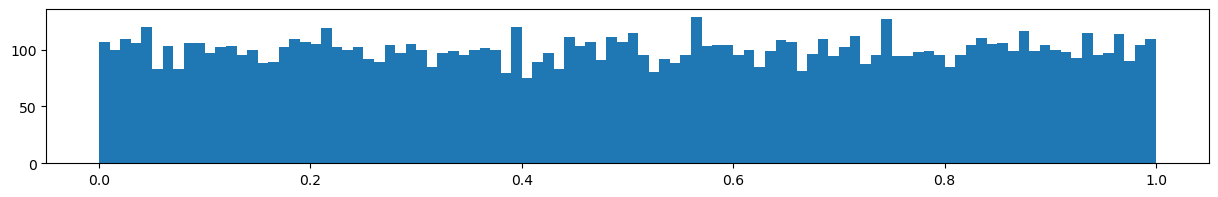

In [148]:
import matplotlib.pyplot as plt
x= np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=100)  # bins= 구간의 개수
plt.show()

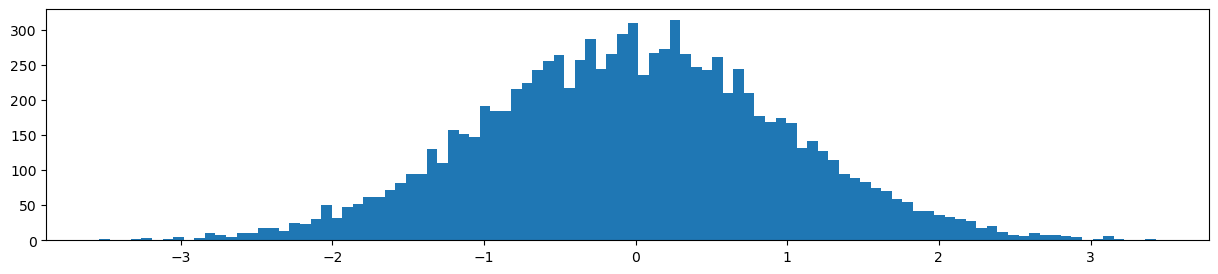

In [155]:
x= np.random.randn(10000)
plt.figure(figsize=(15,3)) 
plt.hist(x, bins=100) 
plt.show()

In [156]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [157]:
np.random.uniform(-1, 10, (2,5)) # -1~10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [158]:
np.random.normal(10, 2, (2,5)) # 평균 10 표준편차 2 인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, step, dtype) : from부터 stop까지 step씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열 (float으로 나옴)

In [168]:
# linspace는 많은 수의 점들을 생성
x = np.linspace(2, 2*np.pi, 10)
y = np.sin(x)                

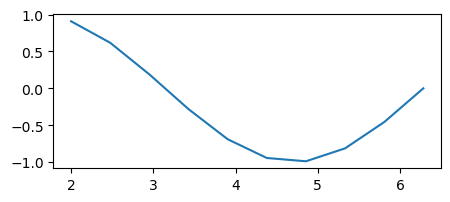

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x,y)
plt.show()

In [171]:
np.linspace(0,2,20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

## 2.5 배열 차원 변경하기
- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1이 올 수 없음
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환  
- ※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [172]:
a = np.random.random((2,3))
a

array([[0.76747565, 0.82500925, 0.4066403 ],
       [0.45130841, 0.40063163, 0.99513816]])

In [175]:
np.round(a*10)  # 계산은 배열의 각 요소에 적용 round() : 반올림 / floor() : 내림 / ceil() : 올림

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [184]:
a= a.reshape(3,2)
a

array([[0.76747565, 0.82500925],
       [0.4066403 , 0.45130841],
       [0.40063163, 0.99513816]])

In [186]:
a.reshape(-1,1)  # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[0.76747565],
       [0.82500925],
       [0.4066403 ],
       [0.45130841],
       [0.40063163],
       [0.99513816]])

In [188]:
a.resize((2,3))  # 결과를 출력하지 않는 함수는 배열을 바꿈. 단 reshape 처럼 -1은 쓸수 없다
a

array([[0.76747565, 0.82500925, 0.4066403 ],
       [0.45130841, 0.40063163, 0.99513816]])